In [ ]:
import pandas as pd
df=pd.read_csv('/content/news (5).csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
df.shape

(6335, 4)

In [ ]:
df.size

25340

In [ ]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

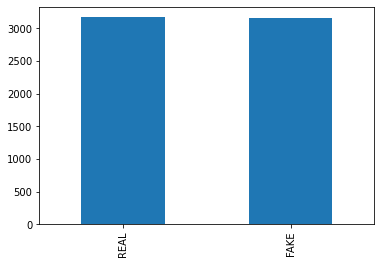

In [ ]:

#PLOTING BAR GGRAPH FOR LABEL-Fake and Real
df['label'].value_counts().plot(kind='bar')

In [ ]:
#Divide data into input and output: x-input  y-outputl
x=df['text'].values
x 
# when text messages are involved ,we have to take input in 1 dimension

array(['Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that th

In [ ]:
y=df['label'].values
y

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

In [ ]:

#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
#Convertong textual data into numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
x_train_v=vect.fit_transform(x_train) 
x_test_v=vect.transform(x_test)



In [ ]:
#apply svm
from sklearn.svm import SVC
model=SVC()

In [ ]:
model.fit(x_train_v,y_train)

SVC()

In [ ]:
y_pred=model.predict(x_test_v)
y_pred #predicted value

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [ ]:
y_test # actual value

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [ ]:
a= df['text'][10]
a

'CEDAR RAPIDS, Iowa — “I had one of the most wonderful rallies of my entire career right here in 1992,” Bill Clinton said by way of opening to the crowd of more than 1,100 on Saturday night.\n\nTwo days before the Iowa caucuses, Cedar Rapids tried to deliver that same old feeling to his wife, Hillary Clinton.\n\nIn the crowd,\xa0one woman held a sign that said “227 years of men. It’s HER turn!" Some carried signs and books. Others had traveled from as far as Missouri. They had waited hours, even after the fire marshal told them there was no more room inside the high school gymnasium.\n\nThe restive crowd chanted slogans and buzzed with anticipation until finally Bill, Hillary and Chelsea Clinton all appeared on stage hand-in-hand, an hour behind schedule. As they roared, Hillary Clinton beamed.\n\nIt has been a long slog in Iowa for the Clinton campaign, which has struggled mightily to shake the label that its supporters can’t muster the enthusiasm of its rival’s backers. As the caucus

In [ ]:
a= vect.transform([a])
model.predict(a)

array(['REAL'], dtype=object)

In [ ]:
b='win free tickets'
b

'win free tickets'

In [ ]:
b= vect.transform([b])
model.predict(b)

array(['FAKE'], dtype=object)

In [ ]:
#ACCURACY
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

92.73989898989899

In [ ]:


#Pipeline in sklearn - joining of one or more module- we joinig Tfidf and svc
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [ ]:
y_pred= text_model.predict(x_test)
y_pred

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [ ]:
#check accuracy for new  model
accuracy_score(y_pred,y_test)*100

92.73989898989899

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
#719 -true positive ,750- true negative,48 -false negative,67-false positives

array([[719,  48],
       [ 67, 750]])

In [ ]:
a=df['text'][2]
a

'U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.\n\nKerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Hollande, then return to Washington.\n\nThe visit by Kerry, who has family and childhood ties to the country and speaks fluent French, could address some of the criticism that the United States snubbed France in its darkest hour in many years.\n\nThe French press on Monday was filled with questions about why neither President Obama nor Kerry attended Sunday’s march, as about 40 leaders of other nations did. Obama was said to have stayed away because his own security needs can be taxing on a country, 

In [ ]:
a=vect.transform([a])
model.predict(a)

array(['REAL'], dtype=object)

In [ ]:
import joblib
joblib.dump(text_model,'Fake-News')

['Fake-News']

In [ ]:
!pip install streamlit --quiet

In [ ]:
%%writefile app.py
#%%writefile is a magic command to create app.py file
import streamlit as st
import joblib

text_model = joblib.load('Fake-News')
st.title('FAKE NEWS CLASSIFIER')
ip = st.text_input('Enter the text')

op = text_model.predict([ip])
if st.button('Predict'):
  st.title(op[0])

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-05-25 07:24:19.861 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.911s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.186.181.132:8501

your url is: https://wise-islands-open-35-186-181-132.loca.lt
  Stopping...
^C
